In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# Generate Random Linear Dataset

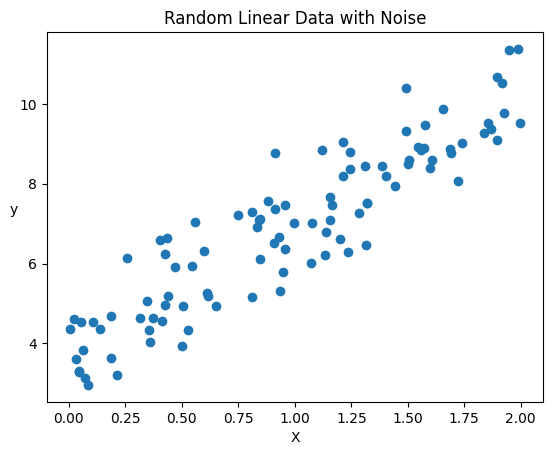

In [2]:
# Set random seed for reproducibility
np.random.seed(93)

m = 100 # Data points Count
n = 1 # Feature Count

# Generate random x values (uniform distribution)
X = 2 * np.random.rand(m, n) # 100 x 1 matrix
X_b = np.c_[np.ones((m, n)), X] # We include Bias Term

# True parameters (slope = 3, intercept = 4)
true_slope = 3
true_intercept = 4

# Generate y values with noise (standard normal distribution)
noise = np.random.randn(m, 1) # 100 x 1 matrix
y = true_slope * X + true_intercept + noise

# Plot the data
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y", rotation=0)
plt.title("Random Linear Data with Noise")
plt.show()

# Normal Equation
$
\boldsymbol{\theta} = \left( X^T X \right)^{-1} X^T \mathbf{y}
$

In [3]:
#theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta = np.linalg.pinv(X_b) @ y  # Safer with Pseudo Inverse

In [4]:
y_pred = X_b @ theta
rmse = np.sqrt(np.mean((y - y_pred)**2))

print(rmse)
print(y[0], y_pred[0])

0.8211084227659498
[8.19116608] [7.67710814]


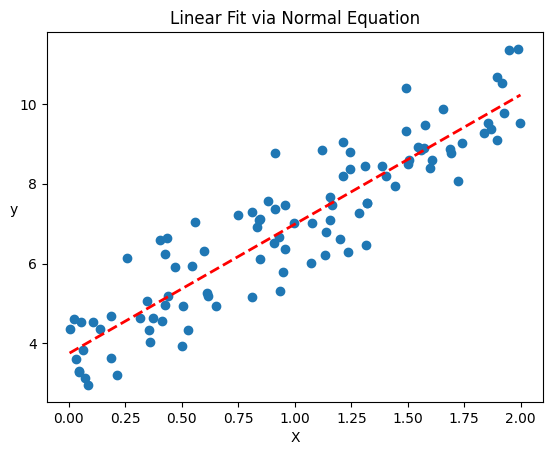

In [5]:
x_line = np.linspace(X.min(), X.max(), m).reshape(-1,1)
X_line_b = np.c_[np.ones((x_line.shape[0], 1)), x_line]
y_line = X_line_b @ theta

plt.figure()
plt.scatter(X, y)
plt.plot(x_line, y_line, linewidth=2, color='r', linestyle='dashed')
plt.xlabel("X")
plt.ylabel("y", rotation=0)
plt.title("Linear Fit via Normal Equation")
plt.show()

# Gradient Descent

Batch Gradient Descent - Parameter Update
$$\theta_j := \theta_j - \alpha \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

In [6]:
theta = np.random.rand(n+1, 1)
learning_rate = 0.01
n_iterations = 500

for _ in range(n_iterations):
    y_pred = X_b @ theta
    gradient = (1/m) * X_b.T @ (y_pred - y)
    theta = theta - learning_rate * gradient
    

y_pred = X_b @ theta
rmse = np.sqrt(np.mean((y - y_pred)**2))
rmse

0.8317847208619159

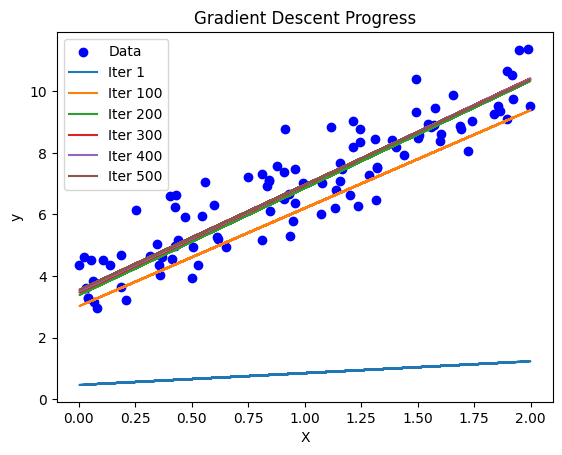

0.8283940243147115

In [7]:
theta = np.random.rand(n+1, 1)
learning_rate = 0.01
n_iterations = 500

plot_every = 100 
plt.scatter(X, y, color='blue', label='Data')

for iteration in range(1, n_iterations + 1):
    y_pred = X_b @ theta
    gradient = (1/m) * X_b.T @ (y_pred - y)
    theta = theta - learning_rate * gradient

    if iteration % plot_every == 0 or iteration == 1:
        y_line = X_b @ theta
        plt.plot(X, y_line, label=f'Iter {iteration}')

plt.xlabel("X")
plt.ylabel("y")
plt.title("Gradient Descent Progress")
plt.legend()
plt.show()
    
y_pred = X_b @ theta
rmse = np.sqrt(np.mean((y - y_pred)**2))
rmse